<h1 style='color:blue'>Pan Card Validation Using Pandas

In [1]:
import pandas as pd
import numpy as np

In [450]:
df = pd.read_excel("C:\\Users\\sam\\Downloads\\PAN+Card+Validation+in+SQL+-+Scripts\\PAN Card Validation in SQL - Scripts\\PAN Number Validation Dataset.xlsx")

In [451]:
df

,Pan_Numbers
0,VGLOD3180G
1,PHOXD7232L
2,MGEPH6532A
3,JJCHK4574O
4,XTQIJ2330L
...,...
9995,TNGUY429!V
9996,SMMN33673g
9997,NaN
9998,RLAI69795t


## Identify Missing Data 

In [452]:
df['Pan_Numbers'] = df['Pan_Numbers'].str.strip()

In [453]:
df_cleaned = df[df['Pan_Numbers'].notna()]

In [454]:
df_cleaned['Pan_Numbers'] = df_cleaned['Pan_Numbers'].str.upper()

C:\Users\sam\AppData\Local\Temp\ipykernel_30160\1478692626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Pan_Numbers'] = df_cleaned['Pan_Numbers'].str.upper()


In [455]:
pattern = r'^[A-Z]{5}[0-9]{4}[A-Z]$'
valid_pan = df_cleaned[df_cleaned['Pan_Numbers'].str.match(pattern)]


In [456]:
valid_pan

,Pan_Numbers
0,VGLOD3180G
1,PHOXD7232L
2,MGEPH6532A
3,JJCHK4574O
4,XTQIJ2330L
...,...
4995,ZJWPC0684F
4996,NSXZF3296V
4997,APBHZ0717P
4998,MAYLS1413K


In [457]:
df_cleaned1 = df_cleaned.drop_duplicates(subset='Pan_Numbers').reset_index()

In [458]:
df_cleaned1

,index,Pan_Numbers
0,0,VGLOD3180G
1,1,PHOXD7232L
2,2,MGEPH6532A
3,3,JJCHK4574O
4,4,XTQIJ2330L
...,...,...
9021,9994,ZMVA03025O
9022,9995,TNGUY429!V
9023,9996,SMMN33673G
9024,9998,RLAI69795T


## Adjacent characters(alphabets) cannot be the same (like AABCD is invalid; AXBCD is valid)

In [459]:
record1 = []
for pan in valid_pan.Pan_Numbers:
    i = pan[:5]
    state = True
    for j in range(len(i)-1):
        if (i[j] == i[j+1]):
            state = False
            break
    if state == True:
        record1.append(pan)
    else:
        pass
print(len(record1))
    
            

4324


## All five characters cannot form a sequence (like: ABCDE, BCDEF is invalid; ABCDX is valid)

#### The ord() function in Python is used to get the Unicode code point of a character. Essentially, it converts a character into its corresponding integer value according to the Unicode standard.

In [460]:
record2 = []
for j in record1:
    initial = False
    first_five = j[0:5]
    
    if first_five.isalpha():
        for i in range(len(first_five)-1):
            if ord(first_five[i+1]) - ord(first_five[i]) != 1:
                initial = True
                break
        if initial == True:
            record2.append(j)
        else:
            pass
print(len(record2))

4324


## Adjacent characters(digits) cannot be the same (like 1123 is invalid; 1923 is valid

In [461]:
record3 = []
for j in record2:
    first_four_num_repeating = j[5:9]   # middle 4 characters
    
    if first_four_num_repeating.isdigit():  # check if all 4 are digits
        sequence = False
        for i in range(len(first_four_num_repeating)-1):
            #print(j,first_four_num_repeating,first_four_num_repeating[i],first_four_num_repeating[i+1])
            if (int(first_four_num_repeating[i]) == int(first_four_num_repeating[i+1])):
                sequence = True
                break
        if sequence == False:
            record3.append(j)
        else:
            pass
print(len(record3))

3193


## All four characters cannot form a sequence (like: 1234, 2345

In [462]:
record4 = []
for j in record3:
    first_four_num = j[5:9]   # middle 4 characters
    
    if first_four_num.isdigit():  # check if all 4 are digits
        is_sequential = True
        for i in range(len(first_four_num)-1):
            if (int(first_four_num[i+1]) - int(first_four_num[i])) != 1:
                is_sequential = False
                break
        if is_sequential == False:
            record4.append(j)
        else:
            pass
print(len(record4))
cleaned_pans = pd.DataFrame(data=record4,columns=['Pan_Numbers'])
cleaned_pans.reset_index(drop=True, inplace=True)
cleaned_pans

3186


,Pan_Numbers
0,VGLOD3180G
1,PHOXD7232L
2,MGEPH6532A
3,HTJYM3835H
4,HVOFE5635Y
...,...
3181,ZJWPC0684F
3182,NSXZF3296V
3183,APBHZ0717P
3184,MAYLS1413K


<h1 style='color:Purple'>Cleanded Pan Records

In [463]:
df_cleaned1["Status"] = np.where(df_cleaned1.Pan_Numbers.isin(cleaned_pans['Pan_Numbers']),"Valid_Pan_card","Not_valid")
#df_cleaned1 = df_cleaned1.drop(columns=['index'])
df_cleaned1

,index,Pan_Numbers,Status
0,0,VGLOD3180G,Valid_Pan_card
1,1,PHOXD7232L,Valid_Pan_card
2,2,MGEPH6532A,Valid_Pan_card
3,3,JJCHK4574O,Not_valid
4,4,XTQIJ2330L,Not_valid
...,...,...,...
9021,9994,ZMVA03025O,Not_valid
9022,9995,TNGUY429!V,Not_valid
9023,9996,SMMN33673G,Not_valid
9024,9998,RLAI69795T,Not_valid


<AxesSubplot:>

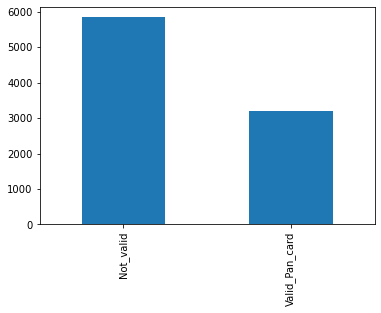

In [464]:
df_cleaned1['Status'].value_counts().plot.bar()

In [465]:
missing_records = len(df) - (len(df_cleaned1[df_cleaned1.Status == 
                                             'Valid_Pan_card']) +   len(df_cleaned1[df_cleaned1.Status == 'Not_valid']))
missing_records

974

## Summary

In [466]:
print(f"Total Number of Records is {len(df)}")
print(f"Total Number of Valid Pan Card Records is {len(df_cleaned1[df_cleaned1.Status == 'Valid_Pan_card'])}")
print(f"Total Number of In_valid Pan Card Records is {len(df_cleaned1[df_cleaned1.Status == 'Not_valid'])}")
print(f"Total Number of Missing Records is {missing_records}")

Total Number of Records is 10000
Total Number of Valid Pan Card Records is 3186
Total Number of In_valid Pan Card Records is 5840
Total Number of Missing Records is 974
